## Imports

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text

from PIL import Image
import urllib
import os
import math

As opposed to other examples, from now on I'll be using [matplotlib sytlesheets](https://matplotlib.org/stable/tutorials/introductory/customizing.html) to create my visuals and save a ton of lines of code.

In [98]:
from matplotlib.font_manager import FontProperties

# Specify your font
regular = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Regular.ttf")  # Update the path to where the font is installed on your system
light = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Light.ttf")  # Update the path to where the font is installed on your system
bold = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Bold.ttf")  # Update the path to where the font is installed on your system

In [99]:
league = 'Premier League'

## Reading the data

In [100]:
data = pd.read_csv(r"C:\Users\George\Documents\Football Analytics\fotmob_Premier League_expected_data.csv")
data.head()

,id,date,team_name,team_id,xG_for,xG_ag,xGOT_for,xGOT_ag,goals_for,goals_ag,venue
0,4193450,2023-08-11 19:00:00+00:00,Burnley,8191,0.33,2.08,0.02,2.73,0,3,H
1,4193450,2023-08-11 19:00:00+00:00,Manchester City,8456,2.08,0.33,2.73,0.02,3,0,A
2,4193451,2023-08-12 12:00:00+00:00,Arsenal,9825,0.83,1.18,1.98,0.95,2,1,H
3,4193451,2023-08-12 12:00:00+00:00,Nottingham Forest,10203,1.18,0.83,0.95,1.98,1,2,A
4,4193452,2023-08-12 14:00:00+00:00,AFC Bournemouth,8678,1.37,1.07,1.40,0.70,1,1,H


We want to group the data by team, regardless if the side played at home or on the road. 

In [101]:
data = data[['team_name', 'team_id','xG_for','goals_for']]

In [102]:
data['team_name'] = data['team_name'].replace({'AFC Bournemouth':'Bournemouth','West Bromwich Albion':'West Brom','Preston North End':'Preston','Queens Park Rangers':'QPR','Blackburn Rovers':'Blackburn','Sheffield Wednesday':'Sheffield Weds','Huddersfield Town':'Huddersfield','Rotherham United':'Rotherham Utd', 'Tottenham Hotspur':'Tottenham', 'Newcastle United':'Newcastle Utd', 'Manchester United':'Man United', 'Brighton and Hove Albion':'Brighton','Brighton & Hove Albion':'Brighton', 'Wolverhampton Wanderers':'Wolves', 'Nottingham Forest':'Nott\'ham Forest', 'Sheffield United':'Sheffield Utd', 'West Ham United': 'West Ham', 'Manchester City':'Man City','Tottenham Hotspur': 'Tottenham'})

In [103]:
data = data.groupby(['team_name', 'team_id']).sum().reset_index()
data = data.assign(difference = data['goals_for'] - data['xG_for'])
data = data.sort_values(by='difference').reset_index(drop=True)
data.head()

,team_name,team_id,xG_for,goals_for,difference
0,Everton,8668,54.87,40,-14.87
1,Sheffield Utd,8657,39.05,35,-4.05
2,Brentford,9937,59.83,56,-3.83
3,Liverpool,8650,89.35,86,-3.35
4,Brighton,10204,58.03,55,-3.03


## The Visual

First we create a simple horizontal bar chart

To make our viz more stylish, we perform the following steps:
* Remove the left spine.
* Add gridlines.
* Style the barchart with hatches.
* Add a black line in the center of the barchart.

Next, we annotate the xG differential to the bar chart.

### Adding the logos

Here we add the club's logos to really make our visual stand out.

In [104]:
def add_logo_on_ax(ax, team_id, bw = True):
    '''
    This function adds the logo of a football team on a specific
    axes based on the Fotmob team ID.
    Args:
        - ax (object): the matplotlib axes object.
        - team_id (int): the Fotmob team ID.
        - bw (bool): whether to add the logo as black & white or with color.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png')).convert('LA')
    if bw:
        club_icon = club_icon.convert('LA')
    ax.imshow(club_icon)
    ax.axis("off")
    return ax

### Alternative version with gradient color map

I think I like this one better 😉

In [105]:
gradient = [
    '#de6f57',
    '#d5724d',
    '#cb7644',
    '#c0783e',
    '#b57b38',
    '#a97d35',
    '#9e7f34',
    '#928134',
    '#878137',
    '#7c823a',
    '#71823f',
    '#668244',
    '#5c814a',
    '#528050',
    '#497f56',
    '#407d5b',
    '#387b61',
    '#317966',
    '#2c776a',
    '#29756e',
    '#287271',
]
soc_cm = mcolors.LinearSegmentedColormap.from_list('SOC', gradient, N=50)
#cm.register_cmap(name='SOC', cmap=soc_cm)

### Final Touches

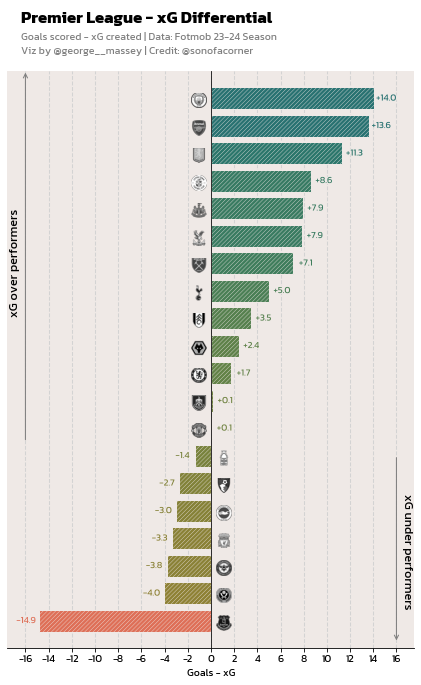

In [106]:
fig = plt.figure(figsize=(7,10), dpi=75)
ax = plt.subplot()
# -- Axes settings --------------------------------
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
ax.yaxis.set_ticks([])
# -- Hatches --------------------------------------
plt.rcParams['hatch.linewidth'] = 0.35
# -- Axes limits and tick positions ---------------
# Ensure symmetrical limits on the x-axis
max_ = max(abs(data['difference'].min()), data['difference'].max())
# Add 10% margin of the limit to the x-axis
max_ = max_*(1.18)
ax.set_xlim(-max_, max_)
ax.set_ylim(-1, data.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.set_xlabel('Goals - xG', size=10, fontproperties = regular)
# -- Bar Chart -------------------------------------
# Declare CMAP & Normalization
norm = mcolors.Normalize(vmin=data['difference'].min(),vmax=data['difference'].max())
cmap = plt.get_cmap('SOC')
ax.barh(
    data.index, data['difference'],
    hatch='//////', ec='#efe9e6',
    color = cmap(norm(data['difference'])),
    zorder=3
)
ax.plot(
    [0,0],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    color='black',
    lw=.75,
    zorder=3
)
# -- Annotations -----------------------------------
# -- Transforms for the placement of the logo ax ---
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
for index, x in enumerate(data['difference']):
    if x < 0:
        sign_offset = -1
        offset_logo = .45
        sign_text = ''
    else:
        sign_offset = 1
        offset_logo = 1.75
        sign_text = '+'
    text_ = ax.annotate(
        xy=(x, index),
        xytext=(sign_offset*12,0),
        text=f'{sign_text}{x:.1f}',
        color= cmap(norm(x)),
        size=9,
        fontproperties = regular,
        ha='center',
        va='center',
        textcoords='offset points'
    )
    text_.set_path_effects([
        path_effects.Stroke(
            linewidth=2, 
            foreground='#efe9e6'
        ), 
        path_effects.Normal()
    ])
    # -- Add the logo
    team_id = data['team_id'].iloc[index]
    ax_coords = DC_to_NFC([sign_offset*(-1)*offset_logo, index - 0.5])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "C")
    add_logo_on_ax(logo_ax, team_id, True)

# -- Figure title and arrows --------------------------------
position_negative = data[data['difference'] < 0].index.max()
position_x_negative = math.floor(-max_*(.9))
position_x_positive = math.ceil(max_*(.9))
ax.annotate(
    xy=(position_x_negative,position_negative + .5),
    xytext=(position_x_negative,ax.get_ylim()[1]),
    text='',
    arrowprops=dict(arrowstyle='<-',color='gray')
)
ax.annotate(
    xy=(position_x_positive,position_negative),
    xytext=(position_x_positive,ax.get_ylim()[0] + .2),
    text='',
    arrowprops=dict(arrowstyle='<-',color='gray')
)
mid_point_positive = (position_negative + ax.get_ylim()[1])/2
mid_point_negative = (position_negative + ax.get_ylim()[0])/2
ax.annotate(
    xy=(position_x_negative,mid_point_positive),
    text='xG over performers',
    rotation=90,
    xytext=(-10,0),
    textcoords='offset points',
    ha='center',
    va='center',
    size=12,
    fontproperties = regular
)
ax.annotate(
    xy=(position_x_positive,mid_point_negative),
    text='xG under performers',
    rotation=-90,
    xytext=(10,0),
    textcoords='offset points',
    ha='center',
    va='center',
    size=12,
    fontproperties = regular
)

for label in ax.get_xticklabels():
    label.set_fontproperties(regular)
for label in ax.get_yticklabels():
    label.set_fontproperties(regular)

fig_text(
    x = 0.15, y = .94, 
    s = f'{league} - xG Differential',
    va = 'bottom', ha = 'left',
    fontsize = 16, color = 'black', fontproperties = bold
)

fig_text(
    x = 0.15, y = 0.9, 
    s = 'Goals scored - xG created | Data: Fotmob 23-24 Season\nViz by @george__massey | Credit: @sonofacorner ',
    va = 'bottom', ha = 'left',
    fontsize = 10, color = 'gray', fontproperties = regular
)

ax.set_facecolor('#EFE9E6')

plt.savefig(
	f"C:\\Users\\George\\Documents\\Football Analytics\\Visuals\\{league} xG Differential Sonofacorner.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)